In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy 

%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$query=SELECT%20%60month_name%60%2C%20%60month%60%2C%20%60year%60%2C%20%60query_count%60%2C%20%60query_text%60'

In [3]:
fire_endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=fire&year=2016'

In [4]:
fire_endpoint

'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=fire&year=2016'

In [5]:
fire_response = requests.get(fire_endpoint)

In [6]:
fire_response

<Response [200]>

In [7]:
fire_response = fire_response.json()

In [8]:
fire_response

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [9]:
search_fire_response = {}
for line in fire_response:
    count = int(line.get('query_count'))
    text = line.get('month_name')
    if text in fire_response:
        search_fire_response[text] += count
    else:
        search_fire_response[text] = count

In [10]:
search_fire_response = pd.DataFrame.from_dict(search_fire_response, orient='index')[0]


In [11]:
search_fire_response

January      19
February     35
March        32
April        26
May          24
June         31
July         24
August       47
September    36
October      38
November     32
December     38
Name: 0, dtype: int64

In [12]:
search_fire_response= search_fire_response.reset_index()
search_fire_response.columns = ['month_name', 'query_count']
search_fire_response.head()

,month_name,query_count
0,January,19
1,February,35
2,March,32
3,April,26
4,May,24


In [13]:
search_fire_response = search_fire_response.sort_values(by = 'query_count', ascending = False)
search_fire_response

,month_name,query_count
7,August,47
9,October,38
11,December,38
8,September,36
1,February,35
2,March,32
10,November,32
5,June,31
3,April,26
4,May,24


In [14]:
queries_endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&year=2016'

In [15]:
queries_endpoint = requests.get(queries_endpoint)
queries_endpoint

<Response [200]>

2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur? 

In [16]:
top_queries = pd.DataFrame(queries_endpoint.json())

In [17]:
top_queries = top_queries.sort_values(by = 'query_count', ascending = False)
top_queries

,month_name,year,query_count,query_text
50,September,2016,408,annual enrollment
21,April,2016,293,Districts
56,November,2016,279,civil service meeting minutes
32,June,2016,250,pay plan
54,October,2016,230,annual enrollment
...,...,...,...,...
45,August,2016,104,codes
0,January,2016,104,maps
16,March,2016,101,civil service
11,March,2016,101,police


3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  

In [18]:
codes_endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&query_text=codes'

In [19]:
codes_endpoint = requests.get(codes_endpoint)
codes_endpoint

<Response [200]>

In [20]:
codes_query = pd.DataFrame(codes_endpoint.json())
codes_query.sort_values(by = 'query_count', ascending = False)

,month_name,year,query_count,query_text,month
55,May,2017,269,codes,NaN
54,August,2018,225,codes,NaN
53,August,2017,222,codes,NaN
52,July,2017,215,codes,NaN
51,June,2020,208,codes,6
50,October,2017,206,codes,NaN
49,June,2018,204,codes,NaN
48,November,2018,201,codes,NaN
47,June,2017,192,codes,NaN
46,January,2021,191,codes,1


4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [21]:
top_500_endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 1&$limit=500&$order=query_count DESC'

In [22]:
top_500_endpoint = requests.get(top_500_endpoint)
top_500_endpoint

<Response [200]>

In [23]:
top_500_query = pd.DataFrame(top_500_endpoint.json())
top_500_query.sort_values(by = 'year', ascending = True)

,month_name,month,year,query_count,query_text
143,June,NaN,2014,207,ebid
422,April,NaN,2014,152,maps
42,February,NaN,2014,298,ebid
122,January,NaN,2014,223,ebid
218,September,NaN,2014,183,annual enrollment
...,...,...,...,...,...
423,June,6,2021,151,maps
184,January,1,2021,191,codes
208,July,7,2021,184,recycling
132,January,1,2021,215,ESS


In [24]:
top_500_query['query_text'].str.replace('MAPS', 'maps')

0                   test
1              directory
2              Nashville
3      annual enrollment
4      annual enrollment
             ...        
495                  ess
496                 jobs
497       animal control
498                 maps
499                 maps
Name: query_text, Length: 500, dtype: object

In [25]:
top_maps_query = top_500_query.loc[(top_500_query['query_text']=='maps')]
top_maps_query




,month_name,month,year,query_count,query_text
16,April,NaN,2017,351,maps
24,March,NaN,2017,331,maps
69,May,NaN,2017,266,maps
71,June,NaN,2017,265,maps
92,September,NaN,2018,240,maps
99,August,NaN,2017,238,maps
102,July,NaN,2017,236,maps
105,February,NaN,2017,235,maps
119,October,NaN,2017,224,maps
123,September,NaN,2017,222,maps


In [26]:
top_maps_query.sort_values(by = 'query_count', ascending = False)

,month_name,month,year,query_count,query_text
16,April,NaN,2017,351,maps
24,March,NaN,2017,331,maps
69,May,NaN,2017,266,maps
71,June,NaN,2017,265,maps
92,September,NaN,2018,240,maps
99,August,NaN,2017,238,maps
102,July,NaN,2017,236,maps
105,February,NaN,2017,235,maps
119,October,NaN,2017,224,maps
123,September,NaN,2017,222,maps


In [27]:
top_maps_query

,month_name,month,year,query_count,query_text
16,April,NaN,2017,351,maps
24,March,NaN,2017,331,maps
69,May,NaN,2017,266,maps
71,June,NaN,2017,265,maps
92,September,NaN,2018,240,maps
99,August,NaN,2017,238,maps
102,July,NaN,2017,236,maps
105,February,NaN,2017,235,maps
119,October,NaN,2017,224,maps
123,September,NaN,2017,222,maps


In [29]:
top_maps_query['query_count'] =top_maps_query['query_count'].astype(str).astype(int)

C:\Users\oxyje\AppData\Local\Temp\ipykernel_17484\4103670430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_maps_query['query_count'] =top_maps_query['query_count'].astype(str).astype(int)


In [30]:
top_maps_query['year'] = top_maps_query['year'].astype(str).astype(int)

C:\Users\oxyje\AppData\Local\Temp\ipykernel_17484\4243457281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_maps_query['year'] = top_maps_query['year'].astype(str).astype(int)


In [31]:
top_maps_query.dtypes

month_name     object
month          object
year            int32
query_count     int32
query_text     object
dtype: object

In [33]:
import seaborn as sns

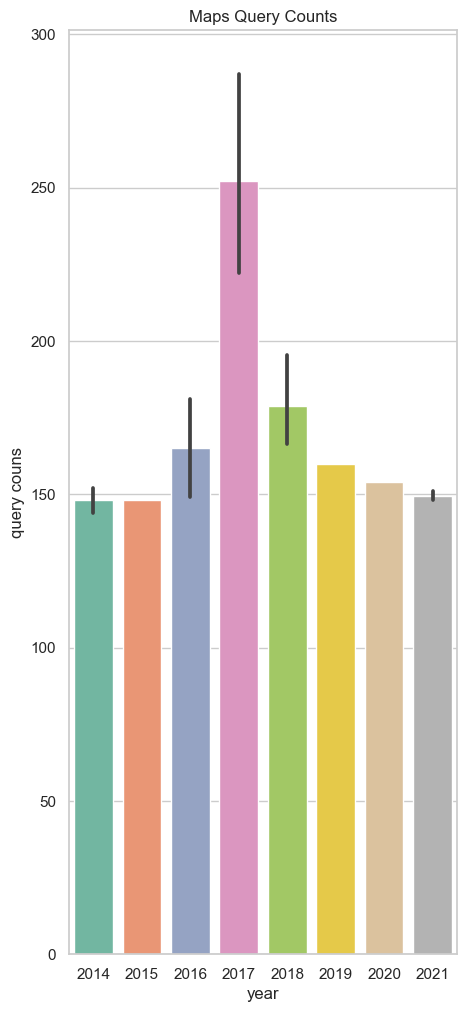

In [35]:
plt.figure(figsize = (5, 12))                              
sns.set(style="whitegrid")                                  
sns.barplot(x = 'year', 
            y = 'query_count', 
            data = top_maps_query, 
            palette = 'Set2')
plt.xlabel('year')                                              
plt.ylabel('query couns')                                              
plt.title('Maps Query Counts');

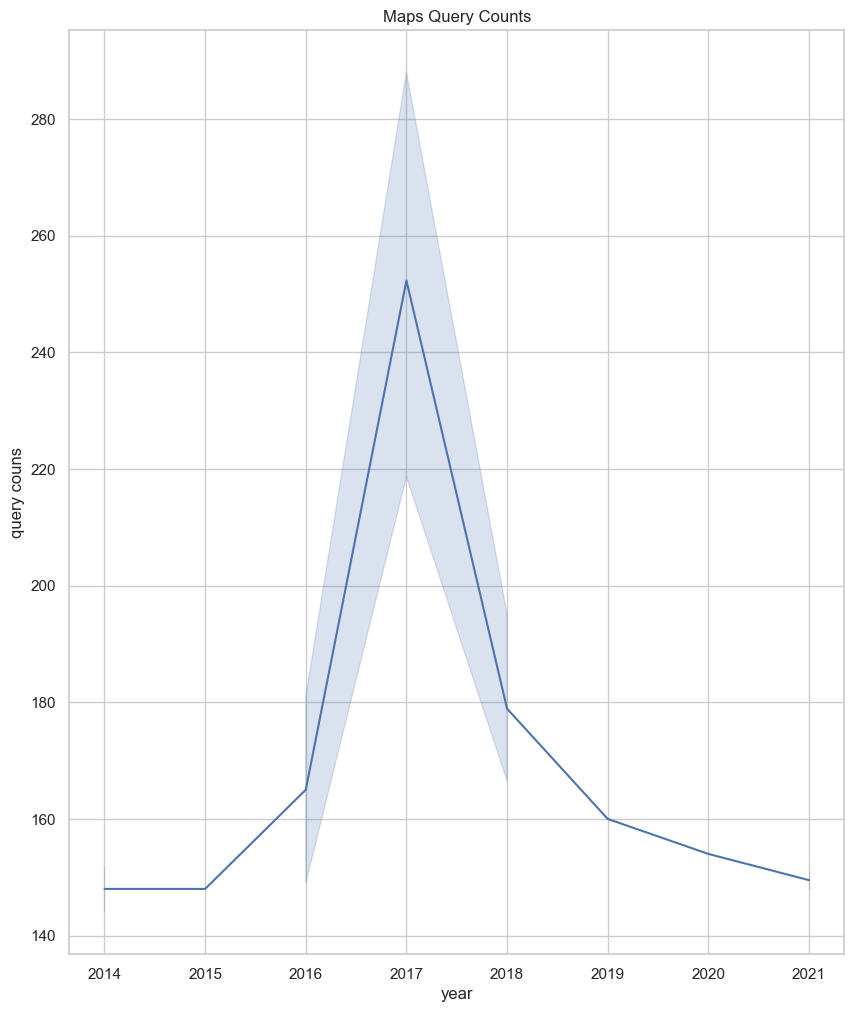

In [38]:
plt.figure(figsize = (10, 12))                              
sns.set(style="whitegrid")                                  
sns.lineplot(x = 'year', 
            y = 'query_count', 
            data = top_maps_query)
plt.xlabel('year')                                              
plt.ylabel('query couns')                                              
plt.title('Maps Query Counts');